# Matplotlib Exploration

In this exercise, I explore the automotive industry's ad data YTD for 2018. I have chosen the following auto companies for this analysis - Chevrolet, Volkswagen, BMW, GMC, Honda, Ford, Nissan, Chrysler, Hyundai and Toyota. This analysis covers 9 out of 10 biggest auto makers in the world by market capitalization, with the exception of Tesla.

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# importing all data
bmw = pd.read_csv('bmw.csv')
chevrolet = pd.read_csv('chevrolet.csv')
chrysler = pd.read_csv('chrysler.csv')
ford = pd.read_csv('ford.csv')
gmc = pd.read_csv('gmc.csv')
honda = pd.read_csv('honda.csv')
hyundai = pd.read_csv('hyundai.csv')
nissan = pd.read_csv('nissan.csv')
toyota = pd.read_csv('toyota.csv')
volkswagen = pd.read_csv('volkswagen.csv')
print('Data imported.')

Data imported.


In [3]:
# combining data in a dictionary
comp_dict = {}
comp_dict[0] = bmw
comp_dict[1] = chevrolet
comp_dict[2] = chrysler
comp_dict[3] = ford
comp_dict[4] = gmc
comp_dict[5] = honda
comp_dict[6] = hyundai
comp_dict[7] = nissan
comp_dict[8] = toyota
comp_dict[9] = volkswagen
frames = []
for i in range(0,10):
    frames.append(comp_dict[i])
vehicles = pd.concat(frames)
print('Data combined.')

Data combined.


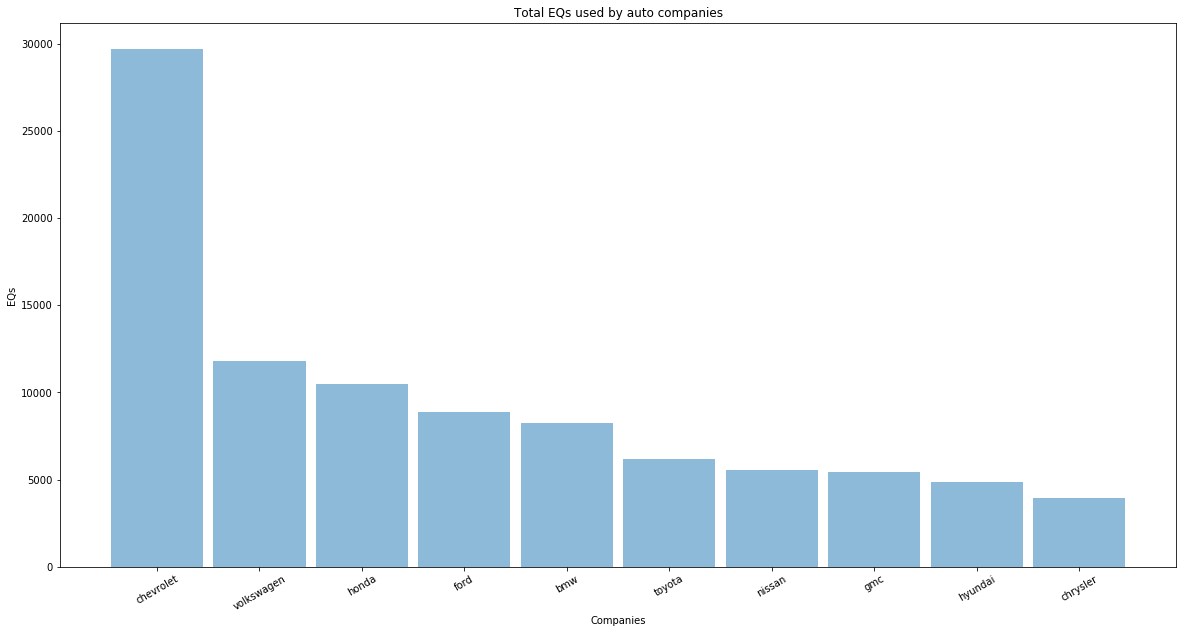

In [4]:
# plotting total EQ units per brand
companies = ['bmw','chevrolet','chrysler','ford','gmc','honda','hyundai','nissan','toyota','volkswagen']
eqs_used = {}
for i in range(0,10):
    eqs_used.update({companies[i]:int(comp_dict[i]['EQ Units'].sum())})
fig1 = plt.figure(figsize = (20,10))
ax1 = fig1.add_subplot(111)
ax1.set_title('Total EQs used by auto companies')
ax1.set_xlabel('Companies')
ax1.set_ylabel('EQs')
comp = sorted(eqs_used, key = eqs_used.get, reverse = True)
eqs = sorted(eqs_used.values(), reverse = True)
y_pos = np.arange(len(comp))
plt.bar(y_pos, eqs, width = 0.9, align = 'center', alpha = 0.5)
plt.xticks(y_pos, comp)
plt.setp(ax1.get_xticklabels(), rotation = 30, horizontalalignment = 'center')
plt.show()

Chevrolet has advertised for the most EQs, being double the nearest competitor which is Volkswagen.

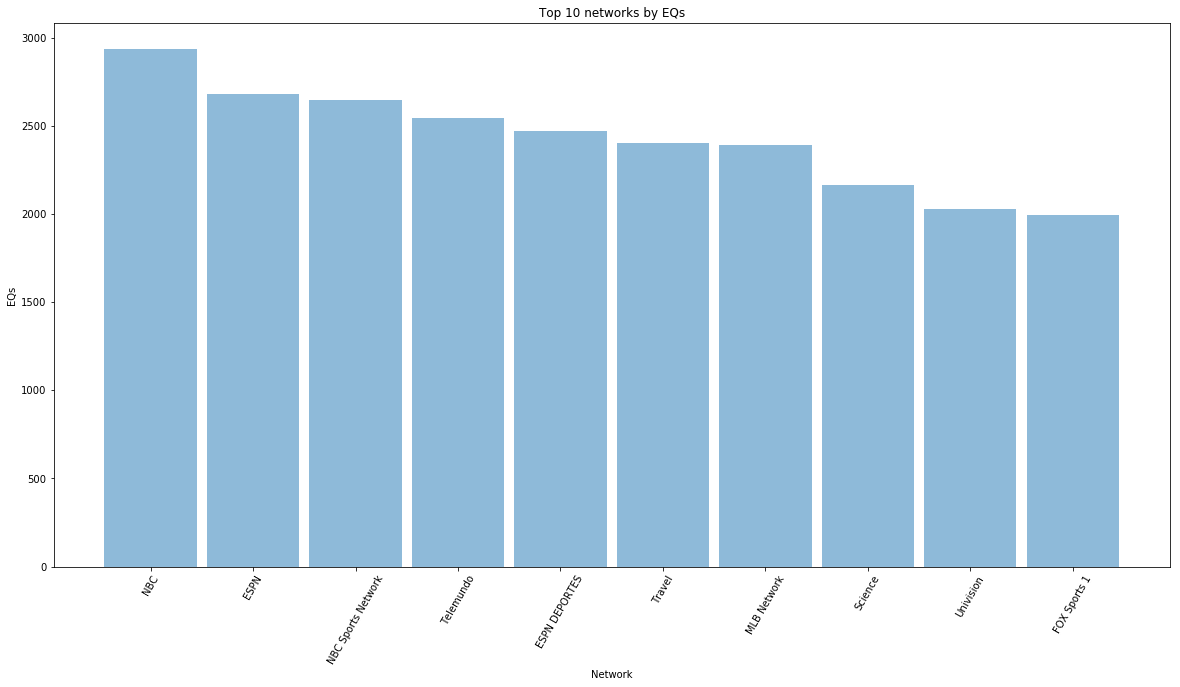

In [21]:
# plotting total EQ units per network
network_dict = {}
networks = list(vehicles.groupby('Network').groups.keys())
network_summary = list(vehicles.groupby('Network')['EQ Units'].sum())
for i in range(len(networks)):
    network_dict.update({networks[i] : network_summary[i]})
fig2 = plt.figure(figsize = (20,10))
ax2 = fig2.add_subplot(111)
ax2.set_title('Top 10 networks by EQs')
ax2.set_xlabel('Network')
ax2.set_ylabel('EQs')
network = sorted(network_dict, key = network_dict.get, reverse = True)
eqs = sorted(network_dict.values(), reverse = True)
y_pos = np.arange(10)
plt.bar(y_pos, eqs[:10], width = 0.9, align = 'center', alpha = 0.5)
plt.xticks(y_pos, network[:10])
plt.setp(ax2.get_xticklabels(), rotation = 60, horizontalalignment = 'center')
plt.show()

There is not a lot of difference between the top networks by gross EQs advertised.

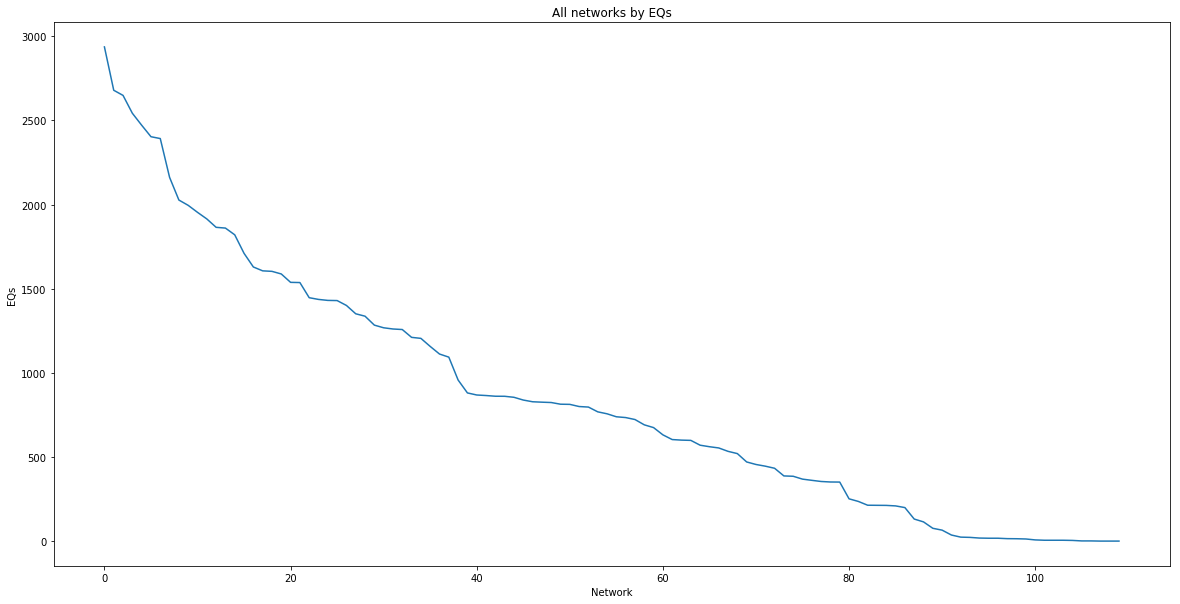

The top  24  out of total 110 networks get more than half of all EQs advertised.


In [22]:
# checking the distribution of EQs
fig3 = plt.figure(figsize = (20,10))
ax3 = fig3.add_subplot(111)
ax3.set_title('All networks by EQs')
ax3.set_xlabel('Network')
ax3.set_ylabel('EQs')
plt.plot(eqs)
plt.show()
total_eqs = vehicles['EQ Units'].sum()
temp = 0
for i in range(len(eqs)):
    temp = temp + eqs[i]
    if temp >= 0.5 * total_eqs:
        break
print('The top ',i+1 ,' out of total', len(eqs), 'networks get more than half of all EQs advertised.')

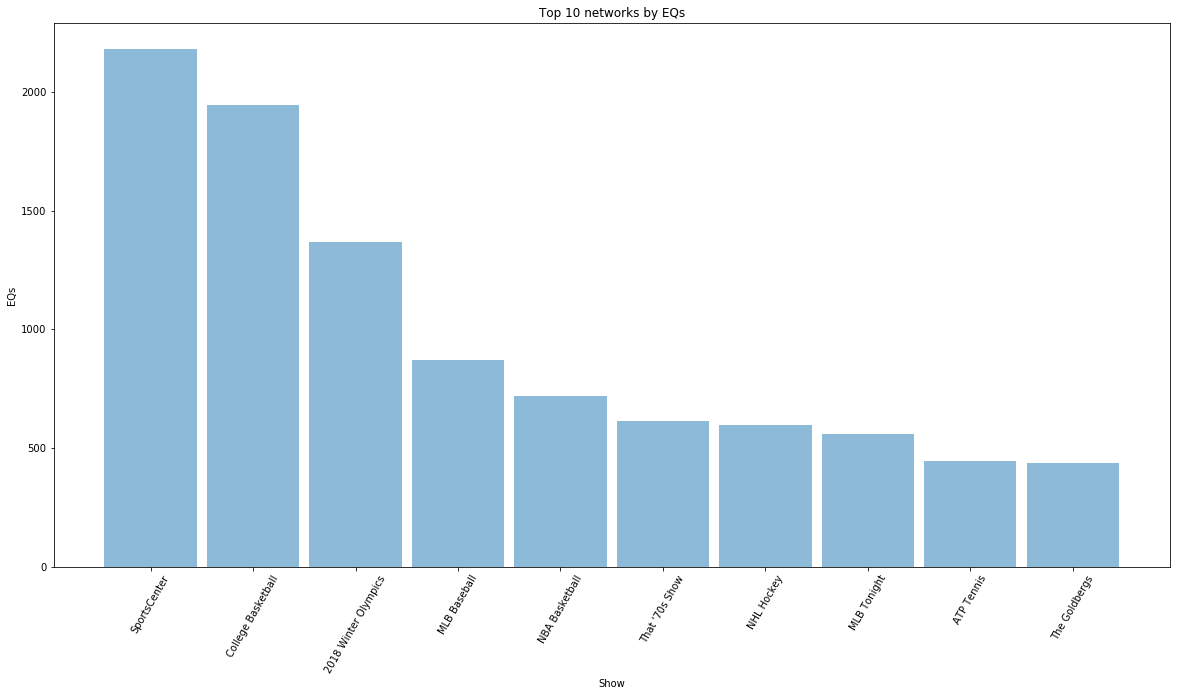

In [6]:
# plotting total EQ units per show
network_dict = {}
networks = list(vehicles.groupby('Show').groups.keys())
network_summary = list(vehicles.groupby('Show')['EQ Units'].sum())
for i in range(len(networks)):
    network_dict.update({networks[i] : network_summary[i]})
fig2 = plt.figure(figsize = (20,10))
ax2 = fig2.add_subplot(111)
ax2.set_title('Top 10 networks by EQs')
ax2.set_xlabel('Show')
ax2.set_ylabel('EQs')
network = sorted(network_dict, key = network_dict.get, reverse = True)
eqs = sorted(network_dict.values(), reverse = True)
y_pos = np.arange(10)
plt.bar(y_pos, eqs[:10], width = 0.9, align = 'center', alpha = 0.5)
plt.xticks(y_pos, network[:10])
plt.setp(ax2.get_xticklabels(), rotation = 60, horizontalalignment = 'center')
plt.show()

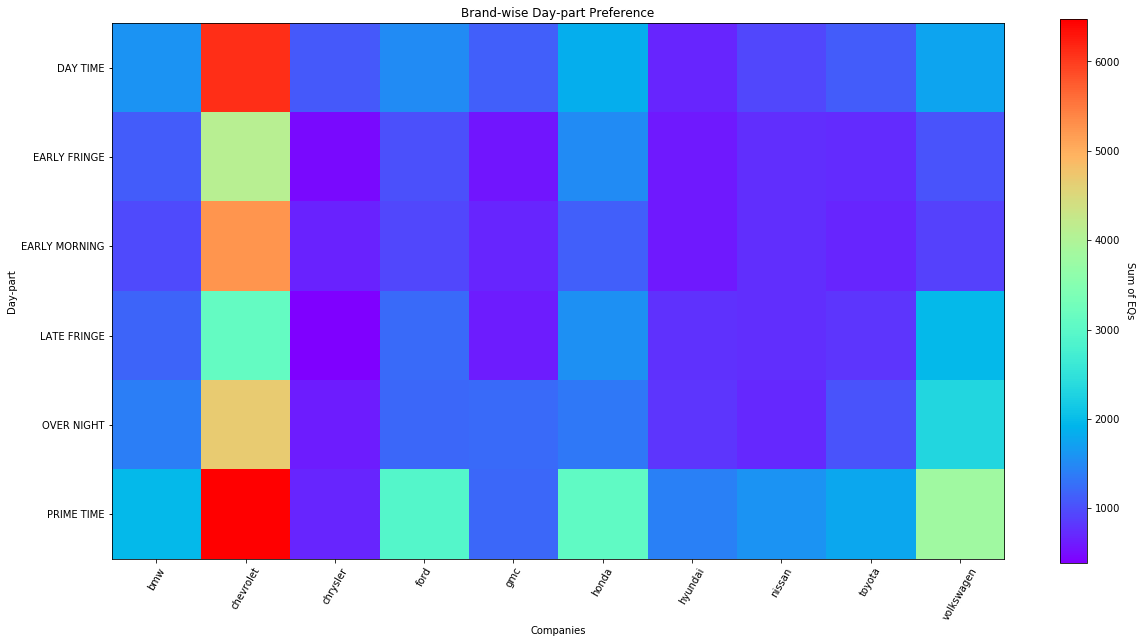

In [8]:
# checking the preference of various brands in time of day
matrix = np.zeros((6,10))
daytime = list(vehicles.groupby('Dayparts').groups.keys())
temp = 0
for i in range(0,6):
    for j in range(0,10):
        matrix[i][j] = vehicles.groupby(['Dayparts','Brand'])['EQ Units'].sum()[temp]
        temp = temp + 1
fig4 = plt.figure(figsize = (20,10))
ax4 = fig4.add_subplot(111)
ax4.set_title('Brand-wise Day-part Preference')
ax4.set_xlabel('Companies')
ax4.set_ylabel('Day-part')
plt.xticks(np.arange(0,10), sorted(comp))
plt.yticks(np.arange(0,6), daytime)
plt.setp(ax4.get_xticklabels(), rotation = 60, horizontalalignment = 'center')
ax4.set_yticks(np.arange(0,6), daytime)
cax = ax4.imshow(matrix, cmap=plt.cm.rainbow, interpolation='nearest')
PCM = ax4.get_children()[2]
cbar = fig4.colorbar(cax)
cbar.set_label('Sum of EQs', rotation=270, labelpad = 15)
plt.show()

The above graph shows that Chevrolet has aggressively advertised during day-time and prime-time. In general, prime-time appears to be the day-part of choice as expected.

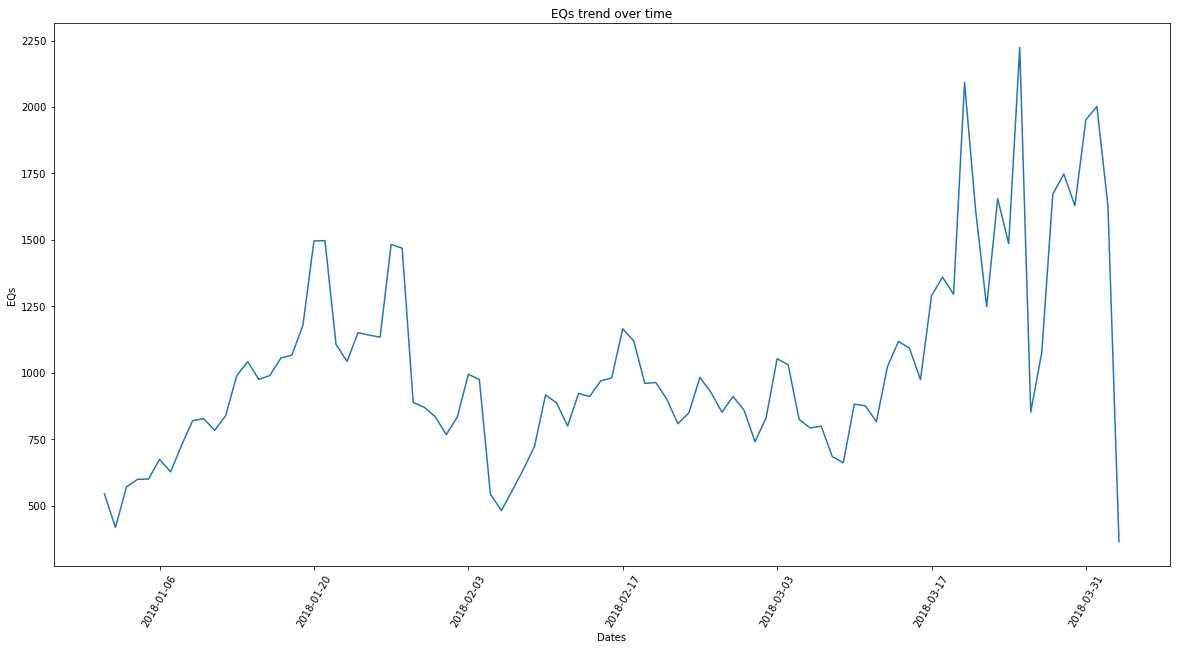

In [9]:
# checking the EQs time trend in the data
vehicles['Date'] = pd.to_datetime(vehicles['Date'])
date = list(vehicles.groupby('Date').groups.keys())
date_eqs = vehicles.groupby(['Date'])['EQ Units'].sum()
fig5 = plt.figure(figsize = (20,10))
ax5 = fig5.add_subplot(111)
ax5.set_title('EQs trend over time')
ax5.set_xlabel('Dates')
ax5.set_ylabel('EQs')
plt.setp(ax5.get_xticklabels(), rotation = 60, horizontalalignment = 'center')
plt.plot(date_eqs)
plt.show()

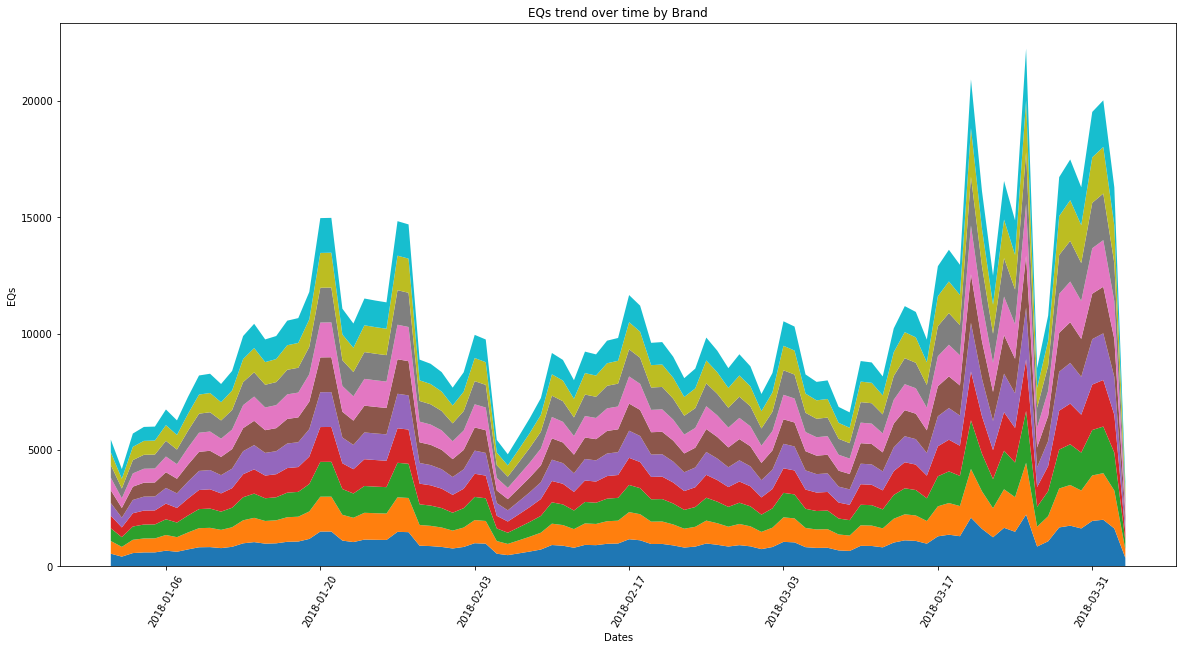

In [10]:
# checking the EQs time trend in the data per auto company
eqs_by_date = []
temp = []
for i in range(0,10):
    temp.append(vehicles.groupby('Date')['EQ Units'].sum())
fig6 = plt.figure(figsize = (20,10))
ax6 = fig6.add_subplot(111)
ax6.set_title('EQs trend over time by Brand')
ax6.set_xlabel('Dates')
ax6.set_ylabel('EQs')
plt.setp(ax6.get_xticklabels(), rotation = 60, horizontalalignment = 'center')
plt.stackplot(date, temp[0], temp[1], temp[2], temp[3], temp[4], temp[5], temp[6], temp[7], temp[8], temp[9], baseline = 'zero', labels = companies)
plt.show()

The above graph seems to imply the ad runs are highly seasonal, but somewhat correlated.

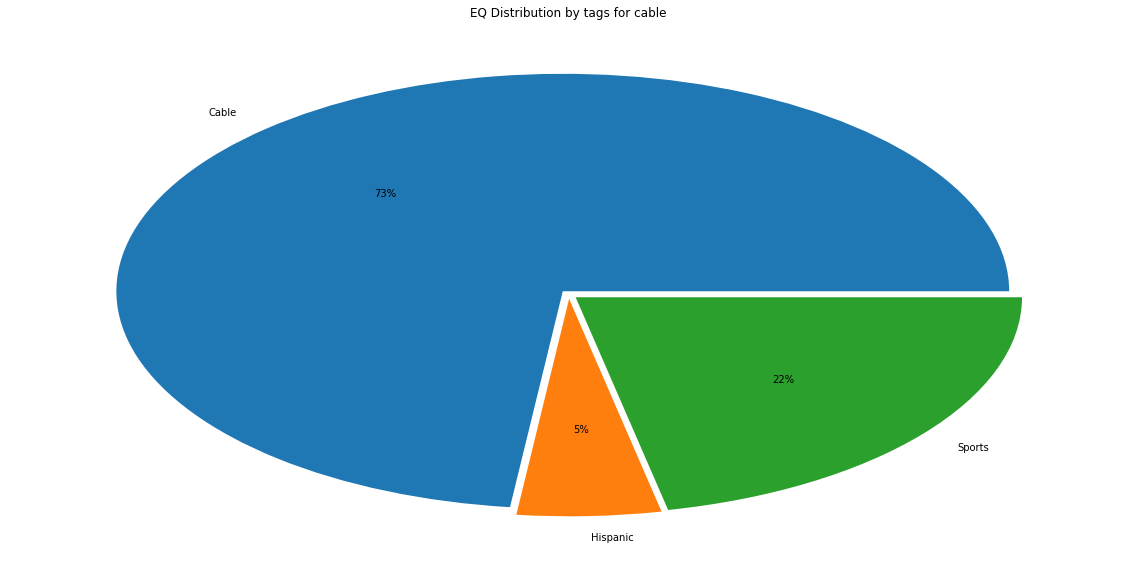

In [11]:
# Distribution of EQs on the basis of tag in cable
fig7 = plt.figure(figsize = (20,10))
ax7 = fig7.add_subplot(111)
ax7.set_title('EQ Distribution by tags for cable')
labels = list(vehicles[vehicles['Network Type'] == 'cable'].groupby('Tag').groups.keys())
fracs = list(vehicles[vehicles['Network Type'] == 'cable'].groupby('Tag')['EQ Units'].sum())
plt.setp(ax7.get_xticklabels(), rotation = 60, horizontalalignment = 'center')
plt.pie(fracs, labels = labels, explode = (0.02, 0.02, 0.02), autopct='%.0f%%')
plt.show()

Cable is an overwhelming majority of EQs, followed by Sports.

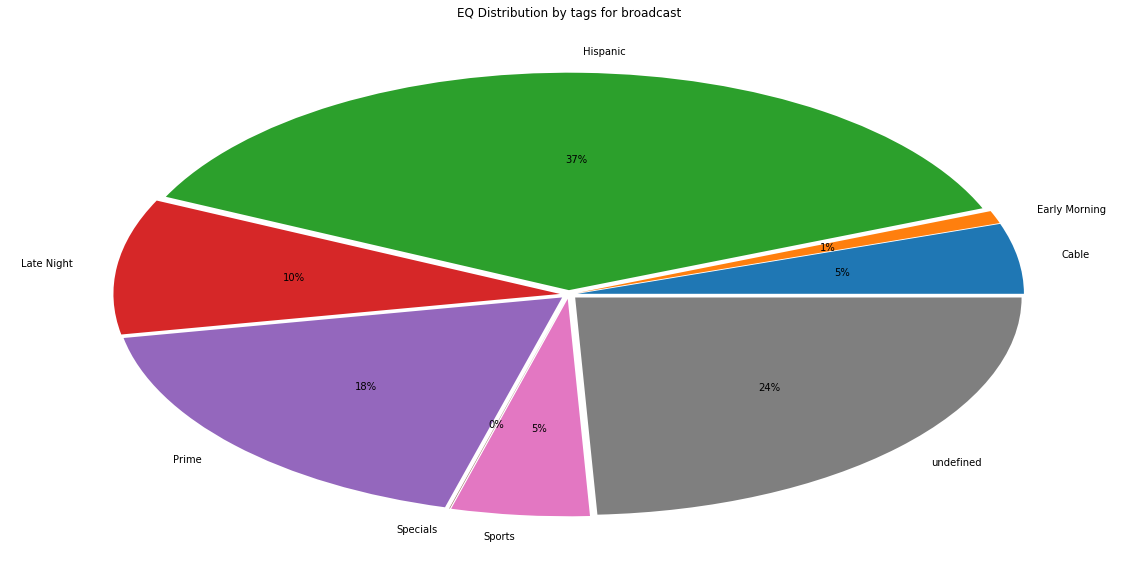

In [12]:
# Distribution of EQs on the basis of tag in broadcast
fig7 = plt.figure(figsize = (20,10))
ax7 = fig7.add_subplot(111)
ax7.set_title('EQ Distribution by tags for broadcast')
labels = list(vehicles[vehicles['Network Type'] == 'broadcast'].groupby('Tag').groups.keys())
fracs = list(vehicles[vehicles['Network Type'] == 'broadcast'].groupby('Tag')['EQ Units'].sum())
plt.setp(ax7.get_xticklabels(), rotation = 60, horizontalalignment = 'center')
plt.pie(fracs, labels = labels, explode = (0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02), autopct='%.0f%%')
plt.show()

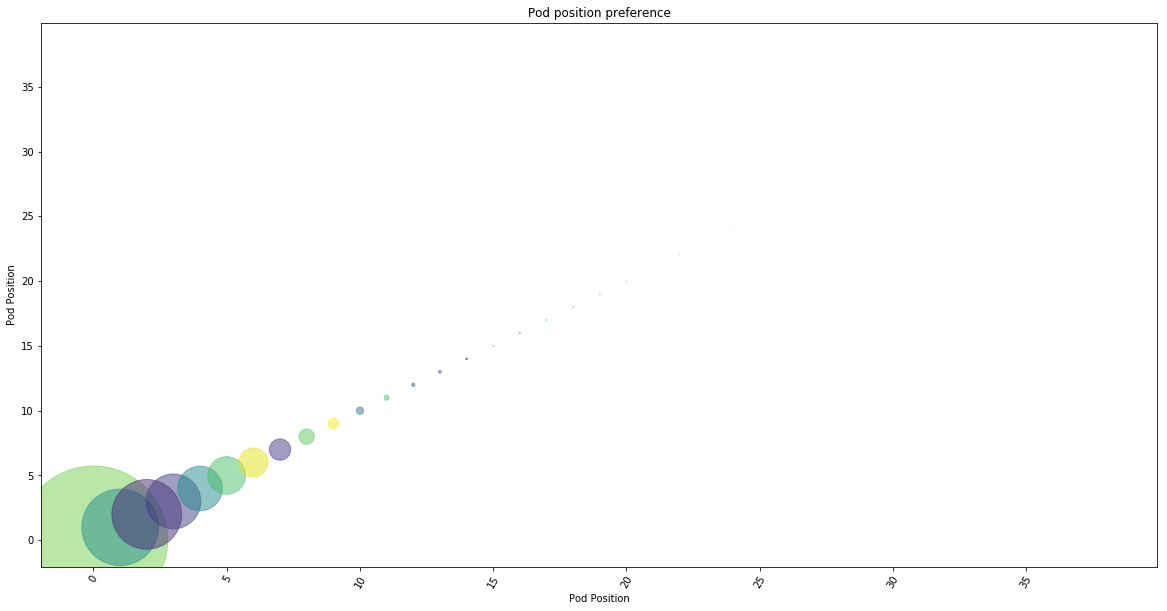

In [13]:
# checking pod position scattering for all brands
fig8 = plt.figure(figsize = (20,10))
ax8 = fig8.add_subplot(111)
ax8.set_title('Pod position preference')
ax8.set_xlabel('Pod Position')
ax8.set_ylabel('Pod Position')
n = np.arange(0,39)
colors = np.random.rand(39)
plt.setp(ax8.get_xticklabels(), rotation = 60, horizontalalignment = 'center')
plt.scatter(n, n, s = np.pi*(np.array(vehicles.groupby('Pod Position')['EQ Units'].sum())**2)/100000, c = colors, alpha=0.5)
plt.show()

The pod positions most favored by the auto companies are the first, because people have most retention of these spots.